# NetworkX

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
node_list = [1, 2, 3, 4, 5, 6, 7] # ['C1', 'C2', 'C3', 'PASS', 'Pub', 'FB', 'Sleep']
edge_list = [
    (1,2), (1,6),
    (2,3), (2,7),
    (3,4), (3,5),
    (4,7),
    (5,1), (5,2), (5,3),
    (6,1), (6,6),
    (7,7)]

## Directed Graph

In [3]:
G_D = nx.DiGraph()
G_D.add_nodes_from(node_list)
G_D.add_edges_from(edge_list)

In [4]:
print(f"Nodes: {G_D.nodes}")
print(f"Edges: {G_D.edges}")

Nodes: [1, 2, 3, 4, 5, 6, 7]
Edges: [(1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 5), (4, 7), (5, 1), (5, 2), (5, 3), (6, 1), (6, 6), (7, 7)]


In [5]:
adj_matrix_D = nx.adjacency_matrix(G_D).todense()
print('Adjacency Matrix:')
print(adj_matrix_D)

Adjacency Matrix:
[[0 1 0 0 0 1 0]
 [0 0 1 0 0 0 1]
 [0 0 0 1 1 0 0]
 [0 0 0 0 0 0 1]
 [1 1 1 0 0 0 0]
 [1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


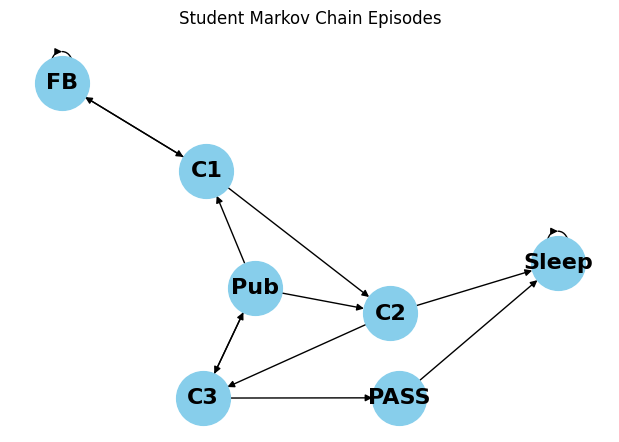

In [6]:
custom_label_D = {1: 'C1', 2: 'C2', 3: 'C3', 4: 'PASS', 5: 'Pub', 6: 'FB', 7: 'Sleep'}
plt.figure(figsize=(6,4))
nx.draw(G_D, 
        with_labels=True, labels=custom_label_D, node_color='skyblue', node_size=1500,
        font_size=16, font_weight='bold')
plt.title('Student Markov Chain Episodes')
plt.show()

## Directed Graph with weights

In [7]:
edge_list_weight = [
    (1,2,0.5), (1,6,0.5),
    (2,3,0.8), (2,7,0.2),
    (3,4,0.6), (3,5,0.4),
    (4,7,1.0),
    (5,1,0.2), (5,2,0.4), (5,3,0.4),
    (6,1,0.1), (6,6,0.9),
    (7,7,1.0)]

In [8]:
G_D_W = nx.DiGraph()
G_D_W.add_nodes_from(node_list)
G_D_W.add_weighted_edges_from(edge_list_weight)

In [9]:
print(f"Nodes: {G_D_W.nodes}")
print(f"Edges: {G_D_W.edges}")

Nodes: [1, 2, 3, 4, 5, 6, 7]
Edges: [(1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 5), (4, 7), (5, 1), (5, 2), (5, 3), (6, 1), (6, 6), (7, 7)]


In [10]:
adj_matrix_D_W = nx.adjacency_matrix(G_D_W).todense()
print('Adjacency Matrix:')
print(adj_matrix_D_W)

Adjacency Matrix:
[[0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.  0.8 0.  0.  0.  0.2]
 [0.  0.  0.  0.6 0.4 0.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.2 0.4 0.4 0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.  1. ]]


# Markov Process

In [11]:
states = ['C1', 'C2', 'C3', 'PASS', 'Pub', 'FB', 'Sleep']
initial_state = 'C1'

state_to_index = {state: i for i, state in enumerate(states)}
index_to_state = {i: state for i, state in enumerate(states)}

## episodes

In [12]:
def simulate_markov_chain(steps, initial_state):
    current_state = initial_state # 최초 설정 state
    current_index = state_to_index[current_state] # 최초 설정 state의 index
    state_sequence = [current_state] # history 기록을 위한 sequence

    for _ in range(steps):
        # 최초의 경우, C1에서 다음 상태로 갈 수 있는 C2나 FB만 선택
        # 최초 이후는, 주어진 state에서 확률이 존재하는 state 중에서 random하게 선택
        next_index = np.random.choice(len(states), p=adj_matrix_D_W[current_index])  
        next_state = index_to_state[next_index]
        state_sequence.append(next_state)
        current_index = next_index
        # 만약 state가 Sleep인 경우, 시뮬레이션을 종료 
        if next_state == 'Sleep':
            print('Sleep State에 도달하였습니다. 시뮬레이션을 종료합니다.')
            break

    return state_sequence        

In [13]:
steps = 10
state_sequence = simulate_markov_chain(steps, initial_state)

print("State Sequence: ", state_sequence)

State Sequence:  ['C1', 'FB', 'FB', 'FB', 'C1', 'C2', 'C3', 'Pub', 'C1', 'FB', 'FB']


# Markov Reward Process

## reward function

In [14]:
# reward function
reward_dict = {1: -2, 2: -2, 3: -2, 4: 10, 5: 1, 6: -1, 7: 0} 

## return function $G_t$

In [15]:
# Return Function
def return_function(state_sequence, gamma = 0.5): # G_t
    # 0 < gamma < 1
    rewards = 0
    for i in range(len(state_sequence)):
        current_state = state_sequence[i]
        current_index = state_to_index[current_state]+1 # index가 0부터 설정되어 있음
        current_reward = reward_dict[current_index]
        temp = (gamma**i) * current_reward
        print(f"state: {current_state}, index: {current_index}, reward: {current_reward}, R: {temp}")
        rewards += (gamma**i) * current_reward
    return rewards

In [16]:
return_function(state_sequence, gamma=0.5)

state: C1, index: 1, reward: -2, R: -2.0
state: FB, index: 6, reward: -1, R: -0.5
state: FB, index: 6, reward: -1, R: -0.25
state: FB, index: 6, reward: -1, R: -0.125
state: C1, index: 1, reward: -2, R: -0.125
state: C2, index: 2, reward: -2, R: -0.0625
state: C3, index: 3, reward: -2, R: -0.03125
state: Pub, index: 5, reward: 1, R: 0.0078125
state: C1, index: 1, reward: -2, R: -0.0078125
state: FB, index: 6, reward: -1, R: -0.001953125
state: FB, index: 6, reward: -1, R: -0.0009765625


-3.0966796875

## Value Function $v(s) = \mathbb{E}[G_t | S_t = s]$

In [ ]:
# 아직 구할 수 없음. (Dynamic Programming, Monte-Carlo evaluation, Temporal-Difference learning을 이용해서 구할 수 있나?)

## Bellman Equation for MRPs

## Undirected Graph

In [15]:
# G_UD = nx.Graph() 
# G_UD.add_nodes_from(node_list)
# G_UD.add_edges_from(edge_list)

# print(f"Nodes: {G_UD.nodes}")
# print(f"Edges: {G_UD.edges}")

# adj_matrix_UD = nx.adjacency_matrix(G_UD).todense()
# print('Adjacency Matrix:')
# print(adj_matrix_UD)

# Pytorch Geometric

- toch_geometric에서 undirected graph를 표현하고자 한다면, 양방향을 모두 edge_index에 표현해주어야 함

In [58]:
!pip install torch_geometric

  Obtaining dependency information for torch_geometric from https://files.pythonhosted.org/packages/03/9f/157e913626c1acfb3b19ce000b1a6e4e4fb177c0bc0ea0c67ca5bd714b5a/torch_geometric-2.6.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.2 MB/s eta 0:00:0000:0100:01


In [59]:
import torch
from torch_geometric.data import Data

/opt/conda/envs/py39/lib/python3.9/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 500: named symbol not found (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._show_config()


## Directed Graph

In [60]:
edge_list_minus_one = [(u-1, v-1) for u,v in edge_list]
print(edge_list_minus_one)

[(0, 1), (0, 5), (1, 2), (1, 6), (2, 3), (2, 4), (3, 6), (4, 0), (4, 1), (4, 2), (5, 0), (5, 5), (6, 6)]


In [61]:
edge_index = torch.tensor(edge_list_minus_one, dtype=torch.long).t()
print(edge_index)

tensor([[0, 0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 6],
        [1, 5, 2, 6, 3, 4, 6, 0, 1, 2, 0, 5, 6]])


In [66]:
num_nodes = len(node_list)

In [67]:
adj_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.float)
print(adj_matrix)

tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])


In [68]:
for u, v, in edge_list_minus_one:
    adj_matrix[u,v] = 1.0

print('Edge index:')
print(edge_index)

print('Adjacency Matrix: ')
print(adj_matrix)

Edge index:
tensor([[0, 0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 6],
        [1, 5, 2, 6, 3, 4, 6, 0, 1, 2, 0, 5, 6]])
Adjacency Matrix: 
tensor([[0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])


In [69]:
x = torch.ones((num_nodes, 1), dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

print('Data Object: ')
print(data)

print('Edge Index: ')
print(data.edge_index)

print('Node Features (x): ')
print(data.x)

Data Object: 
Data(x=[7, 1], edge_index=[2, 13])
Edge Index: 
tensor([[0, 0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 6],
        [1, 5, 2, 6, 3, 4, 6, 0, 1, 2, 0, 5, 6]])
Node Features (x): 
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


## Directed Graph with weights

In [73]:
edge_list_weight_minus_one = [(u-1,v-1,w) for u, v, w in edge_list_weight]
print(edge_list_weight_minus_one)

[(0, 1, 0.5), (0, 5, 0.5), (1, 2, 0.8), (1, 6, 0.2), (2, 3, 0.6), (2, 4, 0.4), (3, 6, 1.0), (4, 0, 0.2), (4, 1, 0.4), (4, 2, 0.4), (5, 0, 0.1), (5, 5, 0.9), (6, 6, 1.0)]


In [76]:
edge_index = torch.tensor([(u,v) for u,v,w in edge_list_weight_minus_one], dtype=torch.long).t()
edge_weight = torch.tensor([w for _, _, w in edge_list_weight_minus_one], dtype=torch.float)

In [77]:
weight_adj_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.float)
print(weight_adj_matrix)

tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])


In [80]:
for u, v, w in edge_list_weight_minus_one:
    weight_adj_matrix[u,v] = w

print('Edge index:')
print(edge_index)

print('Adjacency Matrix: ')
print(weight_adj_matrix)

Edge index:
tensor([[0, 0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 6],
        [1, 5, 2, 6, 3, 4, 6, 0, 1, 2, 0, 5, 6]])
Adjacency Matrix: 
tensor([[0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.8000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.6000, 0.4000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.2000, 0.4000, 0.4000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]])


In [82]:
x = torch.ones((num_nodes, 1), dtype=torch.float)
data_weight = Data(x=x, edge_index=edge_index, edge_attr=edge_weight)

print('Data Object: ')
print(data_weight)

print('Edge Index: ')
print(data_weight.edge_index)

print('Edge Weights (edge_attr): ')
print(data_weight.edge_attr)

print('Node Features (x): ')
print(data_weight.x)

Data Object: 
Data(x=[7, 1], edge_index=[2, 13], edge_attr=[13])
Edge Index: 
tensor([[0, 0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 6],
        [1, 5, 2, 6, 3, 4, 6, 0, 1, 2, 0, 5, 6]])
Edge Weights (edge_attr): 
tensor([0.5000, 0.5000, 0.8000, 0.2000, 0.6000, 0.4000, 1.0000, 0.2000, 0.4000,
        0.4000, 0.1000, 0.9000, 1.0000])
Node Features (x): 
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
